# Tõenäosusteooria ja statistika

<div style="float: left;">Valter Kiisk<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 6.02.2019</div>
<div style="display:none">
$\renewcommand{\vec}{\boldsymbol}$
$\newcommand{\erf}{\mathop{\rm erf}\nolimits}$
$\newcommand{\mod}{\mathop{\rm mod}\nolimits}$
$\newcommand{\cov}{\mathop{\rm cov}\nolimits}$
$\newcommand{\expval}{\mathop{\rm E}\nolimits}$
$\newcommand{\dispers}{\mathop{\rm D}\nolimits}$
</div>

In [4]:
# üldised vahendid
import numpy as np
from numpy import linspace, arange, exp, sin, cos, log, sqrt, pi, fix
from numpy.random import randn, uniform, rand
from matplotlib.pyplot import *
from matplotlib import rcParams

In [5]:
rcParams['figure.dpi'] = 100
rcParams['lines.markersize'] = 4
rcParams['lines.markeredgewidth'] = 1
rcParams['font.size'] = 12
rcParams['axes.prop_cycle'] = cycler('color', 'bgr')

def harrow(x, y, p): # horis. nool pikkusega p alates punktist (x,y)
    annotate('', xy=(x + p, y), xytext=(x, y),
             arrowprops=dict(arrowstyle='-|>', color='black') )

## Jaotusfunktsioon, keskväärtus ja dispersioon

Pidevat juhuslikku suurust $X$ iseloomustab *tõenäosustihedusfunktsioon* $f_X(x)$, kus $f_X(x)dx$ annab tõenäosuse, et järjekordsel katsel omandab $X$ väärtuse vahemikus $x\ldots x+dx$: $$P(x\leq X\leq x+dx)=f_X(x)\,dx.$$ *Kumulatiivne jaotusfunktsioon* $F_X(x)$ annab tõenäosuse, et saadud $X$-i väärtus on väiksem kui $x$: $$P(X\leq x)=F_X(x)=\int_{-\infty}^x f_X(u)\,du.$$ Ilmselt $$P(a\leq X\leq b)=\int_a^b f_X(x)\,dx=F_X(b)-F_X(a).$$ Kuna funktsioonid $f_X(x)$ ja $F_X(x)$ väljendavad tõenäosuseid, siis ilmselt $$\int_{-\infty}^\infty f_X(x)\,dx=1,\quad F_X(-\infty)=0,\quad F_X(\infty)=1.$$

Jaotusfunktsiooni võib karakteriseerida mõningate skalaarsete väärtustega, mida nimetatakse [momentideks](https://en.wikipedia.org/wiki/Moment_%28mathematics%29). Esimest järku moment on [keskväärtus](https://en.wikipedia.org/wiki/Expected_value) (ehk ooteväärtus):
$$\mu=\expval(X)=\int_{-\infty}^\infty x\,f_X(x)\,dx.$$ Teist järku tsentraalmoment on [dispersioon](https://en.wikipedia.org/wiki/Variance): $$\sigma^2=\dispers(X)=\int_{-\infty}^\infty (x-\mu)^2f_X(x)\,dx.$$ Viimane iseloomustab juhusliku suuruse varieeruvust. $\dispers(X)$ asemel võib anda ka [standardhälbe](https://en.wikipedia.org/wiki/Standard_deviation) $\sigma=\sqrt{\dispers(X)}$, mis on $X$-ga samas skaalas ja seega otseselt võrreldav $\mu$-ga.

Näiteks [normaaljaotuse](https://en.wikipedia.org/wiki/Normal_distribution) tihedusfunktsioon otseselt avaldub $\mu$ ja $\sigma$ kaudu: $$f_X(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right].$$ Siin vahe $x-\mu$ tsentreerib jaotuse kohal $x=\mu$ ja jagamine $\sigma$-ga tingib vajaliku mastaabimuutuse.

Normaaljaotuse kumulatiivne jaotusfunktsioon $F_X(x)$ ei avaldu elementaarfunktsioonides ja on aluseks erifunktsioonile $\erf$. [Suur hulk](https://docs.scipy.org/doc/scipy/reference/special.html) selliseid (vektoriseeritud) erifunktsioone on realiseeritud moodulis `scipy.special` (veafunktsioon `erf` ja [Gammafunktsioon](https://en.wikipedia.org/wiki/Gamma_function) `gamma` on siiski nii tuntud, et need saaks vajadusel ka moodulist `math`).

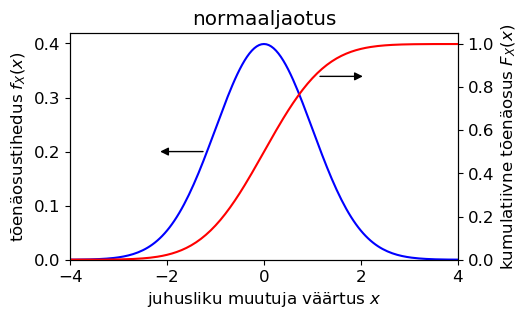

In [6]:
from scipy.special import erf

X = arange(-6, 6, 0.05)
D = exp(-X**2/2) / sqrt(2*pi)
F = (1 + erf(X/sqrt(2))) / 2

figure(figsize=(5,3))
axes()
plot(X, D, 'b-')
xlim(-4, 4)
ylim(bottom=0)
xlabel('juhusliku muutuja väärtus $x$')
ylabel('tõenäosustihedus $f_X(x)$')
harrow(-1.2, 0.2, -1)
gca().twinx()
plot(X, F, 'r-')
ylim(bottom=0)
ylabel('kumulatiivne tõenäosus $F_X(x)$')
title('normaaljaotus')
harrow(1.1, 0.85, 1)
show()

Moodulis `scipy.stats` on olemas [suur hulk](https://docs.scipy.org/doc/scipy/reference/stats.html) statistikafunktsioone. Iga konkreetset jaotust kirjeldab hulk erinevaid, omavahel seotud funktsioone ja karakteristikuid, sh tihedusfunktsioon (*probability density function*, `pdf`), kumulatiivne jaotusfunktsioon (*cumulative distribution function*, `cdf`), viimase pöördfunktsioon ehk [kvantiilfunktsioon](https://en.wikipedia.org/wiki/Quantile_function) (*percent point function*, `ppf`), jne. Need funktsioonid on koondatud ühte objekti. Näiteks normaaljaotuse vahendid on objektis `norm`. Seega eelneva graafiku oleks saanud konstrueerida ka Gaussi kellukese funktsiooni kirjutamata: 

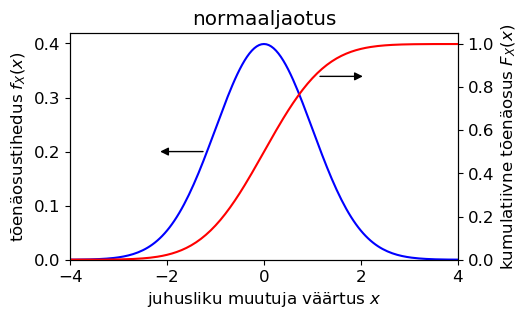

In [7]:
from scipy.stats import norm

figure(figsize=(5,3))
axes()
plot(X, norm.pdf(X), 'b-')
xlim(-4, 4)
ylim(bottom=0)
xlabel('juhusliku muutuja väärtus $x$')
ylabel('tõenäosustihedus $f_X(x)$')
harrow(-1.2, 0.2, -1)
gca().twinx()
plot(X, norm.cdf(X), 'r-')
ylim(bottom=0)
ylabel('kumulatiivne tõenäosus $F_X(x)$')
title('normaaljaotus')
harrow(1.1, 0.85, 1)
show()

Diskreetse juhusliku suuruse (täringuviske tulemus jne) korral tõenäosustihedust ei eksisteeri. Selle asemel saab anda terviklikud tõenäosused selleks, et juhuslik suurus $X$ omandab ühe või teise konkreetse väärtuse $k$. Seda karakteriseerib *suhteline sagedusfunktsioon*. Füüsikas jm valdkondades väga olulise diskreetse jaotuse näide on [Poissoni jaotus](https://en.wikipedia.org/wiki/Poisson_distribution) (mis on omakorda piirjuht [binoomjaotusest](https://en.wikipedia.org/wiki/Binomial_distribution)): $$P(X=k)=\frac{\mu^k}{k!}e^{-\mu}.$$ Selle jaotuse ainus parameeter on keskväärtus $\mu$. Mooduli `scipy.stats` objektide korral suhtelist sagedusfunktsiooni esindab meetod `pmf` (*probability mass function*).

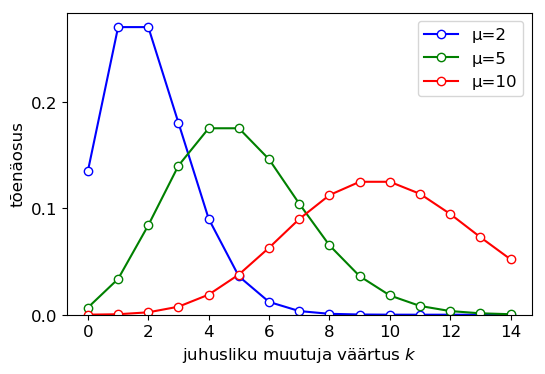

In [4]:
from scipy.stats import poisson as poi

X = arange(15)

figure(figsize=(6,4))
for μ in (2, 5, 10):
    plot(X, poi.pmf(X, μ), 'o-', label='μ=%d' % μ, markerfacecolor='white', markersize=6)
xlabel('juhusliku muutuja väärtus $k$')
ylabel('tõenäosus')
ylim(bottom=0)
yticks( (0, 0.1, 0.2) )
legend()
show()

Keskväärtusel on järgmised lihtsad omadused: $$\expval(aX)=a\expval(X),\quad \expval(X+Y)=\expval(X)+\expval(Y),\quad \expval(XY)=\expval(X)\expval(Y),$$ kus $a$ on konstant. Viimane seos kehtib vaid juhul kui $X$ ja $Y$ on *sõltumatud* juhuslikud suurused. Vastasel korral on mõttekas defineerida uus kvantiteet $$\cov(X,Y)=\expval(XY)-\expval(X)\expval(Y)=\expval\left[(X-\expval(X))(Y-\expval(Y))\right],$$ mis iseloomustab *korrelatsiooni* juhuslike suuruste $X$ ja $Y$ vahel. Seda nimetatakse *kovariatsiooniks*. Pärast normeerimist saadakse [korrelatsioonikordaja](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient): $$r(X,Y)=\frac{\cov(X,Y)}{\sigma(X)\sigma(Y)}.$$

Keskväärtuse omadusi rakendades leiame omakorda: $$\dispers(aX)=a^2\dispers(X),\quad \dispers(X+Y)=\dispers(X)+\dispers(Y)+2\cov(X,Y).$$ Seega sõltumatute juhuslike suuruste korral $\dispers(X+Y)=\dispers(X)+\dispers(Y)$.

Oletagem viimaks, et teatud juhuslik suurus $W$ sõltub meelevaldsel (üldiselt mitttelineaarsel) viisil ühest või mitmest juhuslikust suurusest, näiteks $W=g(X,Y)$, kus $g$ on suvaline diferentseeruv funktsioon. Tuntud erijuht (mis on oluline näiteks mõõtemääramatuse hindamisel) realiseerub kui $X$ ja $Y$ *suhteline* standardhälve $\sigma/\mu$ on väga väike (st palju väiksem kui 1). Siis on statistilises mõttes õigustatud funktsiooni $g(X,Y)$ lineariseerimine $X$ ja $Y$ käskväärtuste ümbruses: $$W\approx g(\expval(X), \expval(Y)) + \left(\frac{\partial g}{\partial X}\right)_{\expval(X),\expval(Y)}(X-\expval(X)) + \left(\frac{\partial g}{\partial Y}\right)_{\expval(X),\expval(Y)}(Y-\expval(Y)).$$ Nüüd on $W$ lineaarses sõltuvuses $X$-st ja $Y$-st, nii et saab rakendada eelmises lõigus sõnastatud dispersiooni omadusi. Kuivõrd konstantsetel liikmetel dispersiooni ei ole, saame $$\dispers(W)=\left(\frac{\partial g}{\partial X}\right)^2\dispers(X) + \left(\frac{\partial g}{\partial Y}\right)^2\dispers(Y)$$ ehk standardhälvete kaudu $$\sigma(W)=\sqrt{\left(\frac{\partial g}{\partial X}\cdot \sigma(X)\right)^2 + \left(\frac{\partial g}{\partial Y}\cdot \sigma(Y)\right)^2}$$

## Juhuslike arvude genereerimine

Lihtsaim [algoritm](https://en.wikipedia.org/wiki/Linear_congruential_generator) ühtlase jaotusega pseudojuhuslike arvude saamiseks arvutis on järgmine: $$x_{n+1}=(ax_n+c)\,\mod\,m,$$ kus $a$, $c$ ja $m$ on täisarvud, kusjuures $0<a<m$ ja $0\leq c<m$. $m$ on suur täisarv ja parameetrite sobiva valiku korral saadavate arvude periood on samuti suurusjärgus $m$ (see siiski ei garanteeri, et saadavad arvud on statistiliselt sõltumatud, näiteks $a=1$ ja $c=1$ korral ei teki isegi näiliselt juhuslikke arve). Jada algväärtus $x_0$ (*seed* ehk seeme) tuleb tekitada mõnel muul viisil. Saadud juhuslikud täisarvud saavad ilmselt olema vahemikus $0\ldots m-1$, vastavad reaalarvud vahemikus $0...1$ saab jagatisega $x/m$. Kaasaegsed süsteemid kasutavad keerukamat algoritmi nimega [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister).

Kui on olemas mingi juhusliku suuruse väärtuste massiiv, siis ligikaudse ettekujutuse saamiseks selle suuruse jaotusfunktsioonist joonestatakse [histogramm](https://en.wikipedia.org/wiki/Histogram). Selle tekitab funktsioon `matplotlib.pyplot.hist`, kus lisaks arvumassiivile saab näidata ka vahemiku (`range`) ja mitmeks intervalliks see jagada (`bins`). Kontrollime histogrammi abil, et nimetatatud algoritm tõepoolest genereerib ühtlase jaotusega arve:

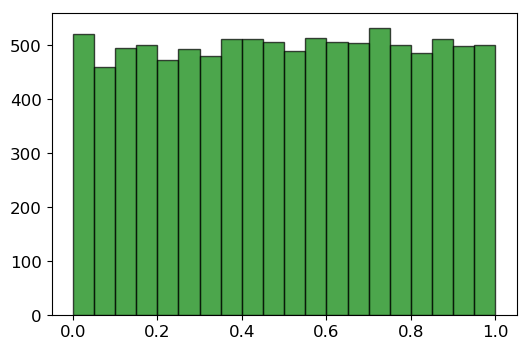

In [5]:
from time import time

m = 2**31-1
a = 1103515245
c = 12345

t = time()      # aeg sekundites
t -= fix(t)  # murdosa

x = int(fix(t * m))
X = []
for i in range(10000):
    x = (a*x + c) % m
    X.append(x/m)

hist(X, bins=20, range=(0,1), facecolor='g', edgecolor='k', alpha=0.7)
show()

Sama töö (aga  Mersenne Twisteri algoritmiga) teevad `rand` jms funktsioonid moodulist `numpy.random`:

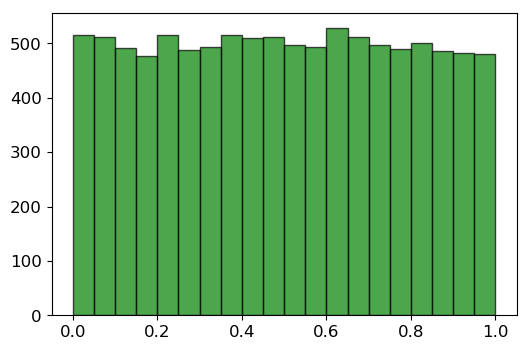

In [6]:
X = rand(10000)
hist(X, bins=20, range=(0,1), facecolor='g', edgecolor='k', alpha=0.7)
show()

Kui ühtlase jaotusega *sõltumatud* juhuslikud arvud $U_1$ ja $U_2$ on olemas, siis standardnormaaljaotusega juhuslikud arvud saab neist [Box-Mulleri](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) teisendusega:
\begin{align*}
N_1 &= \sqrt{-2\ln U_1}\cos(2\pi U_2),\\
N_2 &= \sqrt{-2\ln U_1}\sin(2\pi U_2).
\end{align*}
$N_1$ ja $N_2$ on samuti sõltumatud.

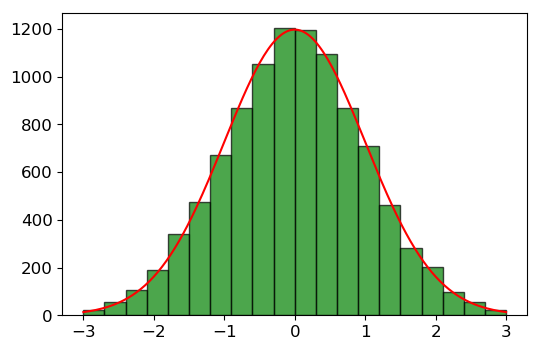

In [7]:
n = 10000

U1 = rand(n)
U2 = rand(n)
X = sqrt(-2*log(U1))*cos(2*pi*U2)

# teoreetilise kõvera jaoks 200 punkti
x = linspace(-3, 3, 200)
y = n*0.3*exp(-x**2/ 2) / sqrt(2*pi)  # vahemik 6 ühikut jagatud 20 osaks = 0.3
hist(X, bins=20, range=(-3,3), facecolor='g', edgecolor='k', alpha=0.7)
plot(x, y, 'r-')
show()

Jällegi, sama töö teeks `numpy.random.randn`.

Olgu $X$ juhuslik suurus jaotusfunktsioonidega $f_X(x)$ ja $F_X(x)$. Me võime konstrueerida uue juhusliku suuruse $Y$ läbi seose $Y=g(X)$, kus $g$ on meelevaldne funktsioon. Milline on suuruse $Y$ tõenäosusjaotus? Kui $g$ on monotoonselt muutuv funktsioon, siis $dx$ ja $dy$ on üheselt seotud: $dy=g'(x)dx$. Vastavad tõenäosused peavad samuti olema võrdsed:
$$f_Y(y)dy=f_X(x)dx,$$ millest pärast $dy$ asendamist $$f_Y(y)=\frac{f_X(x)}{g'(x)}.$$

Oletagem nüüd, et $g=F_X$. Kuna $F_X'(x)=f_X(x)$, siis järelikult $f_Y(y)=1$, st $Y$ on ühtlase jaotusega. Seega, kui me oskame tekitada ühtlase jaotusega juhuslikke arve $u$, siis meelevaldse kumulatiivse jaotusfunktsiooniga $F_X$ juhuslikke arve saab põhimõtteliselt teisendusega $x=F_X^{-1}(u)$, kus $F_X^{-1}$ tähendab $F_X$ pöördfunktsiooni.

[Tsentraalne piirteoreem](https://en.wikipedia.org/wiki/Central_limit_theorem) väidab, et dispersiooni omavate sõltumatute juhuslike suuruste summa jaotus läheneb kiiresti normaaljaotusele (liidetavate arvu kasvades), isegi kui komponentide jaotusfunktsioonid on täiesti erinevad normaaljaotusest. Selles võib veenduda isegi vähese arvu komponentide korral:

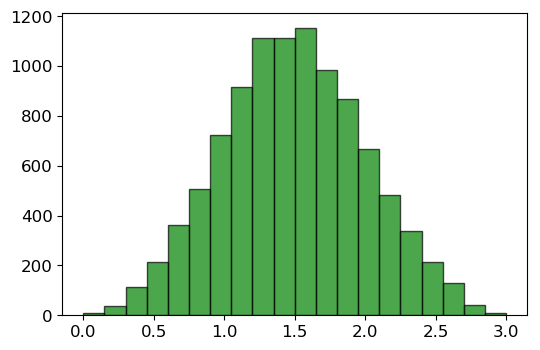

In [8]:
n = 10000 # elementide arv
X = rand(n) + rand(n) + rand(n)

hist(X, bins=20, range=(0,3), facecolor='g', edgecolor='k', alpha=0.7)
show()

On olemas selliseid jaotuseid, millel dispersioon puudub. Näiteks, kui liidetavad alluvad [Cauchy jaotusele](https://en.wikipedia.org/wiki/Cauchy_distribution), siis on summa jaotus alati Cauchy jaotus ja tsentraalne piirteoreem ei kehti.

## Punkthinnangud ja mõõtemääramatus

Reaalse juhusliku suuruse (näiteks mõne füüsikalise suuruse mõõtmistulemuse) tõelist jaotust ja selle parameetreid me ei tea. Olgu korduvate mõõtmiste tulemusena saadud juhuslik valim mõõdiseid $x_1,x_2,\ldots,x_n$ (nagu viimases näites massiiv `X`). Keskväärtuse $\mu$ hinnanguks sobib nende arvude [aritmeetiline keskmine](https://en.wikipedia.org/wiki/Arithmetic_mean): $$\bar x=\frac{\sum x_i}{n}.$$ Lõpliku arvu katsete aritmeetiline keskmine on ise samuti juhuslik suurus, sest iga järgmise $n$-elemendilise arvukogumi jaoks tuleb $\bar x$ erinev. Tähistame seda juhuslikku suurust $\bar X_n$. Aritmeetilise keskmise definitsiooni baasil on lihtne veenduda, et ootuspäraselt $\expval(\bar X_n)=\expval(X)=\mu$.

Juhul kui me teaksime $\mu$ väärtust, võiks $X$ standardhälbe suurust hinnata definitsioonijärgse valemiga: $$s(x)=\sqrt{\frac{\sum (x_i-\mu)^2}{n}}.$$ Tegelikkuses on $\mu$ tundmatu. Selle asemel võib kasutada aritmeetilist keskmist $\bar x$, kuid siis selgub, et $$\expval[s^2(X)]=\frac{n-1}{n}\dispers(X).$$ Seega standardhälbe nihutamata hinnanguks sobib $$s(x)=\sqrt{\frac{\sum (x_i-\bar x)^2}{n-1}}.$$ Sel juhul öeldakse, et statistiline *vabadusastmete arv* on $n-1$, sest kuigi algselt meil oli $n$ sõltumatut andmeüksust $x_i$, sai üks vabadusaste juba ära kasutatud $\bar x$ hindamisel.

NumPy massiivi elementide summa, aritmeetilise keskmise ja standardhälbe saab mooduli `numpy` funktsioonidega `sum`, `mean` ja `std` (või klassi `ndarray` samanimeliste meetoditega). `std` kasutab vaikimisi nimetajas tegurit $n$, mitte $n-1$, kuid seda saab muuta andes funktsioonile nimelise argumendi `ddof=1` (*delta degrees of freedom*).

In [9]:
print('summa =', X.sum())
print('keskmine =', X.mean())
print('standardhälve =', X.std(ddof=1))

summa = 14913.1385398
keskmine = 1.49131385398
standardhälve = 0.503024962593


Antud juhul on muidugi elementide arv $n$ nii suur, et $n$ ja $n-1$ erinevus on marginaalne.

Massiivi `X` aritmeetiline keskmine asub ilmselt histogrammi (kellukese) tipu lähedal ja standardhälve karakteriseerib selle kellukese laiust. Kuna $\bar x$ on samuti juhuslik suurus, tekib küsimus, kas valimi $x_i$ baasil saab hinnata ka $\bar x$ dispersiooni (näiteks mõõtemääramatust, kui korduvalt üle mõõdetud suuruse hinnanguks võetakse $\bar x$). Rakendades aritmeetilisele keskmisele operaatorit $\dispers$ ja lugedes üksikväärtused statistiliselt sõltumatuks, saame $$\dispers(\bar X_n)=\frac{1}{n}\dispers(X).$$ Kui $\dispers(X)$ hinnanguks võtta eespool defineeritud $s^2(x)$, siis suuruse $\bar x$ standardhälbe hinnanguks tuleb $$s(\bar x)=\frac{s(x)}{\sqrt n}=\sqrt{\frac{\sum (x_i-\bar x)^2}{n(n-1)}}.$$ On ilmne, et $s(x)$ praktiliselt ei sõltu katsete arvust $n$ (kui $n$ on suur), seevastu $s(\bar x)$ kahaneb pöördvõrdeliselt $\sqrt n$-ga.

Niisiis, kui massiiv `X` esindab näiteks mõne füüsikalise suuruse üksikmõõtmiste tulemusi, siis selle suuruse tegeliku väärtuse hinnang ja statistilise mõõtemääramatuse hinnang avalduvad järgmiselt:

In [10]:
m = X.mean()
s = X.std(ddof=1)/sqrt(n)
print( 'x = %.3f ± %.3f' % (m,s))

x = 1.491 ± 0.005


Vajadusel tuleb $s(\bar x)$ korrutada sobiva *katteteguriga*, et väljendada mõõtemääramatus nõutud *usaldusnivool*. Kui mõõdiste arv $n$ on suur, siis $\bar x$ on ligikaudu normaaljaotusega juhuslik suurus (tsentraalse piirteoreemi põhjal) ja samas $s(\bar x)$ on juba üsna lähedal $\bar x$ tegelikule standardhälbele, nii et sobiva katteteguri saabki leida normaaljaotuse baasil.

Kui $n$ on väike, aga siiski üksikmõõtmiste tulemused $x_i$ on vähemalt ligikaudu normaaljaotusega, siis suhe $(\bar x-\mu)/s(\bar x)$
järgib hoopis [Student'i t-jaotust](https://en.wikipedia.org/wiki/Student%27s_t-distribution) vabadusastmete arvuga $\nu=n-1$. $\nu\to\infty$ puhul $t$-jaotus läheneb normaaljaotusele.

Moodulis `scipy.stats` on Student'i t-jaotus esindatud objektiga `t`. Näiteks tõenäosustiheduse funktsioon näeb välja selline:

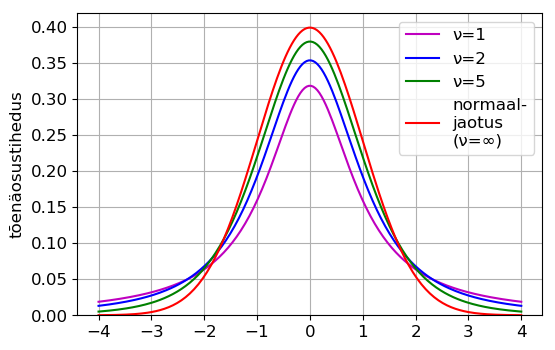

In [11]:
from scipy.stats import t

x = linspace(-4, 4, 200)
plot(x, t.pdf(x, 1), 'm-', label='ν=1')
plot(x, t.pdf(x, 2), 'b-', label='ν=2')
plot(x, t.pdf(x, 5), 'g-', label='ν=5')
plot(x, norm.pdf(x), 'r-', label='normaal-\njaotus\n(ν=∞)' )
ylim(bottom=0)
ylabel('tõenäosustihedus')
grid()
legend()
show()

Usaldusvahemiku otspunktid annab meetod `t.interval`:

In [11]:
p = 0.95  # usaldusnivoo
a, b = t.interval(p, n-1, loc=m, scale=s)
print( 'x asub tõenäosusega %.0f%% vahemikus %.3f ... %.3f' % (100*p, a, b))

x asub tõenäosusega 95% vahemikus 1.481 ... 1.501


Alternatiivselt võib katteteguri eraldi välja arvutada, võttes standardjaotuse (vaikimisi ongi `loc=0` ja `scale=1`). Kasutada võib ka $t$-jaotuse kvantiilfunktsiooni (`t.ppf`).

In [12]:
#k = t.interval(p, n-1)[1]
k = t.ppf(0.5 + p/2, n-1)
print('kattetegur %.2f' % k)
print( 'x = %.3f ± %.3f (usaldusnivool %.0f%%)' % (m, k*s, 100*p))

kattetegur 1.96
x = 1.491 ± 0.010 (usaldusnivool 95%)


Viimaks tabelina kattetegurite väärtused sõltuvalt vabadusastmete arvust ja usaldusnivoost:

In [13]:
from scipy.stats import norm

print('%5s %8s %8s %8s' % ('ν', '90%', '95%', '99%'))
print('-'*35)
for ν in (1, 2, 3, 4, 5, 10, 20):
    print('%5d' % ν, end='')
    for p in (0.9, 0.95, 0.99):
        print(' %8.2f' % t.ppf(0.5+p/2, ν), end='')
        #print(' %8.2f' % t.interval(p, ν)[1], end='')
    print()

print('%5s' % '∞', end='')
for p in (0.9, 0.95, 0.99):
    print(' %8.2f' % norm.ppf(0.5+p/2), end='')

    ν      90%      95%      99%
-----------------------------------
    1     6.31    12.71    63.66
    2     2.92     4.30     9.92
    3     2.35     3.18     5.84
    4     2.13     2.78     4.60
    5     2.02     2.57     4.03
   10     1.81     2.23     3.17
   20     1.72     2.09     2.85
    ∞     1.64     1.96     2.58